In [14]:
import numpy as np
import pandas as pd
import numpy as np

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import plotly.subplots as sp

In [15]:
real_data = pd.read_csv("crab_age.csv")

synthetic_data = pd.read_csv("80000_rows_crab_syn_gmcm.csv")

# synthetic_data.drop(["Unnamed: 0"], axis = 1, inplace = True)

synthetic_data["Age"] = np.round(synthetic_data["Age"]).astype(int)
synthetic_data.drop(["id"], axis = 1, inplace = True)
synthetic_data

,Length,Height,Diameter,Weight,Shell Weight,Sex,Shucked Weight,Viscera Weight,Age
0,1.540001,0.402360,1.323187,38.412226,10.680817,I,15.502503,7.613415,13
1,1.009585,0.267158,0.771067,13.091663,3.417792,M,4.849712,2.909873,9
2,1.141395,0.302497,0.863719,17.369996,4.468052,M,8.744463,4.445586,10
3,1.706633,0.475369,1.188665,39.499762,11.058911,F,19.329699,8.829293,9
4,1.620136,0.447885,1.321516,46.447353,11.952823,F,19.867346,10.575771,12
...,...,...,...,...,...,...,...,...,...
79995,0.917701,0.239803,0.653802,3.011081,1.566707,M,2.062482,0.983874,7
79996,1.562894,0.423914,1.086210,32.555201,8.671204,M,15.944685,5.813928,7
79997,1.369313,0.353145,1.138286,16.554967,5.227133,M,9.600332,2.935033,7
79998,1.463028,0.385249,1.157487,26.639321,8.502676,I,10.529923,6.937421,15


In [16]:
num_of_rows_for_aug = round(len(real_data)/2)
num_of_rows_for_aug

37026

In [17]:
augumented_data = synthetic_data.sample(n = num_of_rows_for_aug) #sample rows from synthetic dataset
augumented_data

,Length,Height,Diameter,Weight,Shell Weight,Sex,Shucked Weight,Viscera Weight,Age
26490,1.108489,0.312851,0.942815,9.664135,4.662423,M,5.359425,2.556988,9
33177,1.532526,0.397816,1.135098,33.417412,9.413120,I,12.953928,7.544154,12
2767,1.148343,0.268939,0.976624,9.116027,2.953161,I,4.265758,2.263690,7
15706,0.652622,0.151734,0.504756,2.395407,0.829073,F,1.347313,0.499342,8
61511,1.049932,0.288189,0.998810,12.573623,5.625751,I,3.689068,1.899879,12
...,...,...,...,...,...,...,...,...,...
77372,1.750520,0.503568,1.374758,50.630168,13.920285,M,21.245995,10.827540,16
72171,1.074335,0.272082,1.000191,12.942764,4.491800,M,5.572948,1.553905,10
78686,1.277127,0.325957,0.994228,18.864243,5.349104,I,9.682455,4.026421,8
65282,1.369870,0.336202,1.029011,27.560007,5.784230,M,11.687306,6.009217,8


<Axes: >

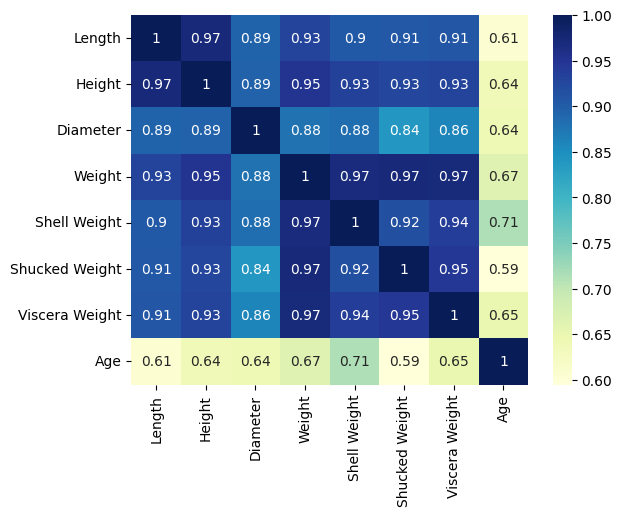

In [18]:
numeric_cols = augumented_data.select_dtypes(include=np.number).columns.tolist()
corr_matrix = augumented_data[numeric_cols].corr()
sns.heatmap(corr_matrix, annot=True, cmap='YlGnBu', cbar=True)

In [19]:
real_data.drop(["id"],axis=1, inplace= True)

In [20]:
input_cols = real_data.columns[:-1]
input_cols

Index(['Sex', 'Length', 'Diameter', 'Height', 'Weight', 'Shucked Weight',
       'Viscera Weight', 'Shell Weight'],
      dtype='object')

In [21]:
target = 'Age'
targets = real_data[target]
input_df = real_data[input_cols]
real_data.drop(columns=['Age'], inplace=True)

real_data

,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight
0,I,1.5250,1.1750,0.3750,28.973189,12.728926,6.647958,8.348928
1,I,1.1000,0.8250,0.2750,10.418441,4.521745,2.324659,3.401940
2,M,1.3875,1.1125,0.3750,24.777463,11.339800,5.556502,6.662133
3,F,1.7000,1.4125,0.5000,50.660556,20.354941,10.991839,14.996885
4,I,1.2500,1.0125,0.3375,23.289114,11.977664,4.507570,5.953395
...,...,...,...,...,...,...,...,...
74046,F,1.6625,1.2625,0.4375,50.660556,20.680960,10.361742,12.332033
74047,I,1.0750,0.8625,0.2750,10.446791,4.323299,2.296310,3.543687
74048,F,1.4875,1.2000,0.4125,29.483480,12.303683,7.540967,8.079607
74049,I,1.2125,0.9625,0.3125,16.768729,8.972617,2.919999,4.280774


In [22]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(real_data, targets, test_size=0.1, random_state=42)

X_val_copy = X_val.copy()
X_train_copy = X_train.copy()
y_train_copy = y_train.copy()
y_val = y_val.copy()

In [23]:
target = 'Age'
augumened_targets = augumented_data[target]
augumented_data.drop(columns=['Age'], inplace=True)


augumented_data

,Length,Height,Diameter,Weight,Shell Weight,Sex,Shucked Weight,Viscera Weight
26490,1.108489,0.312851,0.942815,9.664135,4.662423,M,5.359425,2.556988
33177,1.532526,0.397816,1.135098,33.417412,9.413120,I,12.953928,7.544154
2767,1.148343,0.268939,0.976624,9.116027,2.953161,I,4.265758,2.263690
15706,0.652622,0.151734,0.504756,2.395407,0.829073,F,1.347313,0.499342
61511,1.049932,0.288189,0.998810,12.573623,5.625751,I,3.689068,1.899879
...,...,...,...,...,...,...,...,...
77372,1.750520,0.503568,1.374758,50.630168,13.920285,M,21.245995,10.827540
72171,1.074335,0.272082,1.000191,12.942764,4.491800,M,5.572948,1.553905
78686,1.277127,0.325957,0.994228,18.864243,5.349104,I,9.682455,4.026421
65282,1.369870,0.336202,1.029011,27.560007,5.784230,M,11.687306,6.009217


In [24]:
augmented_train = pd.concat([X_train, augumented_data])
augmented_target = pd.concat([y_train, augumened_targets])

In [25]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
categorical_cols = augmented_train.select_dtypes(exclude=np.number).columns.tolist()
numeric_cols = augmented_train.select_dtypes(include=np.number).columns.tolist()
augmented_train[numeric_cols] = scaler.fit_transform(augmented_train[numeric_cols])
X_val[numeric_cols] = scaler.transform(X_val[numeric_cols])

In [26]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')

encoder.fit(augmented_train[categorical_cols])

encoded_cols = encoder.get_feature_names_out()
encoded_cols

c:\Users\10063\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


array(['Sex_F', 'Sex_I', 'Sex_M'], dtype=object)

In [27]:
augmented_train[encoded_cols] = encoder.transform(augmented_train[categorical_cols])
X_val[encoded_cols] = encoder.transform(X_val[categorical_cols])

In [28]:
input_cols = list(numeric_cols) + list(encoded_cols)
input_cols

['Length',
 'Diameter',
 'Height',
 'Weight',
 'Shucked Weight',
 'Viscera Weight',
 'Shell Weight',
 'Sex_F',
 'Sex_I',
 'Sex_M']

In [29]:
augmented_train = augmented_train[input_cols]
X_val = X_val[input_cols]

In [30]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor

def calculate_regression_metrics(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)

    # Avoid division by zero for MAPE
    non_zero_mask = y_true != 0
    mape = (np.abs(y_true - y_pred) / y_true)[non_zero_mask].mean() * 100

    return pd.Series({
        "MAE": mae,
        "MSE": mse,
        "RMSE": rmse,
        "R-squared": r2,
        "MAPE": mape
    })

In [31]:
from sklearn.model_selection import GridSearchCV

rf = RandomForestRegressor(random_state=42, n_jobs=-1)

param_grid= {
    'n_estimators': [100,200,300,400],
    'max_depth': [1,3,5,7],
    'criterion': ['squared_error', 'poisson']
}


rf_grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    scoring='neg_mean_absolute_error',
    n_jobs=-1,
    cv=5  #5 fold
)

rf_grid_search.fit(augmented_train, augmented_target)

GridSearchCV(cv=5, estimator=RandomForestRegressor(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'criterion': ['squared_error', 'poisson'],
                         'max_depth': [1, 3, 5, 7],
                         'n_estimators': [100, 200, 300, 400]},
             scoring='neg_mean_absolute_error')

In [32]:
best_rf = rf_grid_search.best_estimator_

best_rf.fit(augmented_train, augmented_target)
y_pred = best_rf.predict(X_val)

model_metrics = calculate_regression_metrics(y_val, y_pred)

model_metrics

MAE           1.469513
MSE           4.503902
RMSE          2.122240
R-squared     0.566279
MAPE         14.367141
dtype: float64